# Fraud Detection for m:obile money transactions Project

## Setup and import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [ ]:
data = pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/PS_20174392719_1491204439457_log.csv'

## Explore Data

In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213284 entries, 0 to 1213283
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1213284 non-null  int64  
 1   type            1213284 non-null  object 
 2   amount          1213284 non-null  float64
 3   nameOrig        1213284 non-null  object 
 4   oldbalanceOrg   1213283 non-null  float64
 5   newbalanceOrig  1213283 non-null  float64
 6   nameDest        1213283 non-null  object 
 7   oldbalanceDest  1213283 non-null  float64
 8   newbalanceDest  1213283 non-null  float64
 9   isFraud         1213283 non-null  float64
 10  isFlaggedFraud  1213283 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 101.8+ MB


In [ ]:
data.shape

(1213284, 11)

In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.213284e+06,1.213284e+06,1.213283e+06,1.213283e+06,1.213283e+06,1.213283e+06,1.213283e+06,1213283.0
mean,4.066239e+01,1.621510e+05,8.743203e+05,8.945351e+05,9.820533e+05,1.115598e+06,1.256096e-03,0.0
std,3.763554e+01,2.743148e+05,2.967462e+06,3.003872e+06,2.300522e+06,2.415561e+06,3.541919e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.251324e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,3.400000e+01,7.734315e+04,1.567000e+04,0.000000e+00,1.267875e+05,2.196599e+05,0.000000e+00,0.0
75%,4.300000e+01,2.169558e+05,1.318842e+05,1.714685e+05,9.234993e+05,1.153445e+06,0.000000e+00,0.0
max,1.330000e+02,1.000000e+07,3.893942e+07,3.894623e+07,4.216916e+07,4.220740e+07,1.000000e+00,0.0


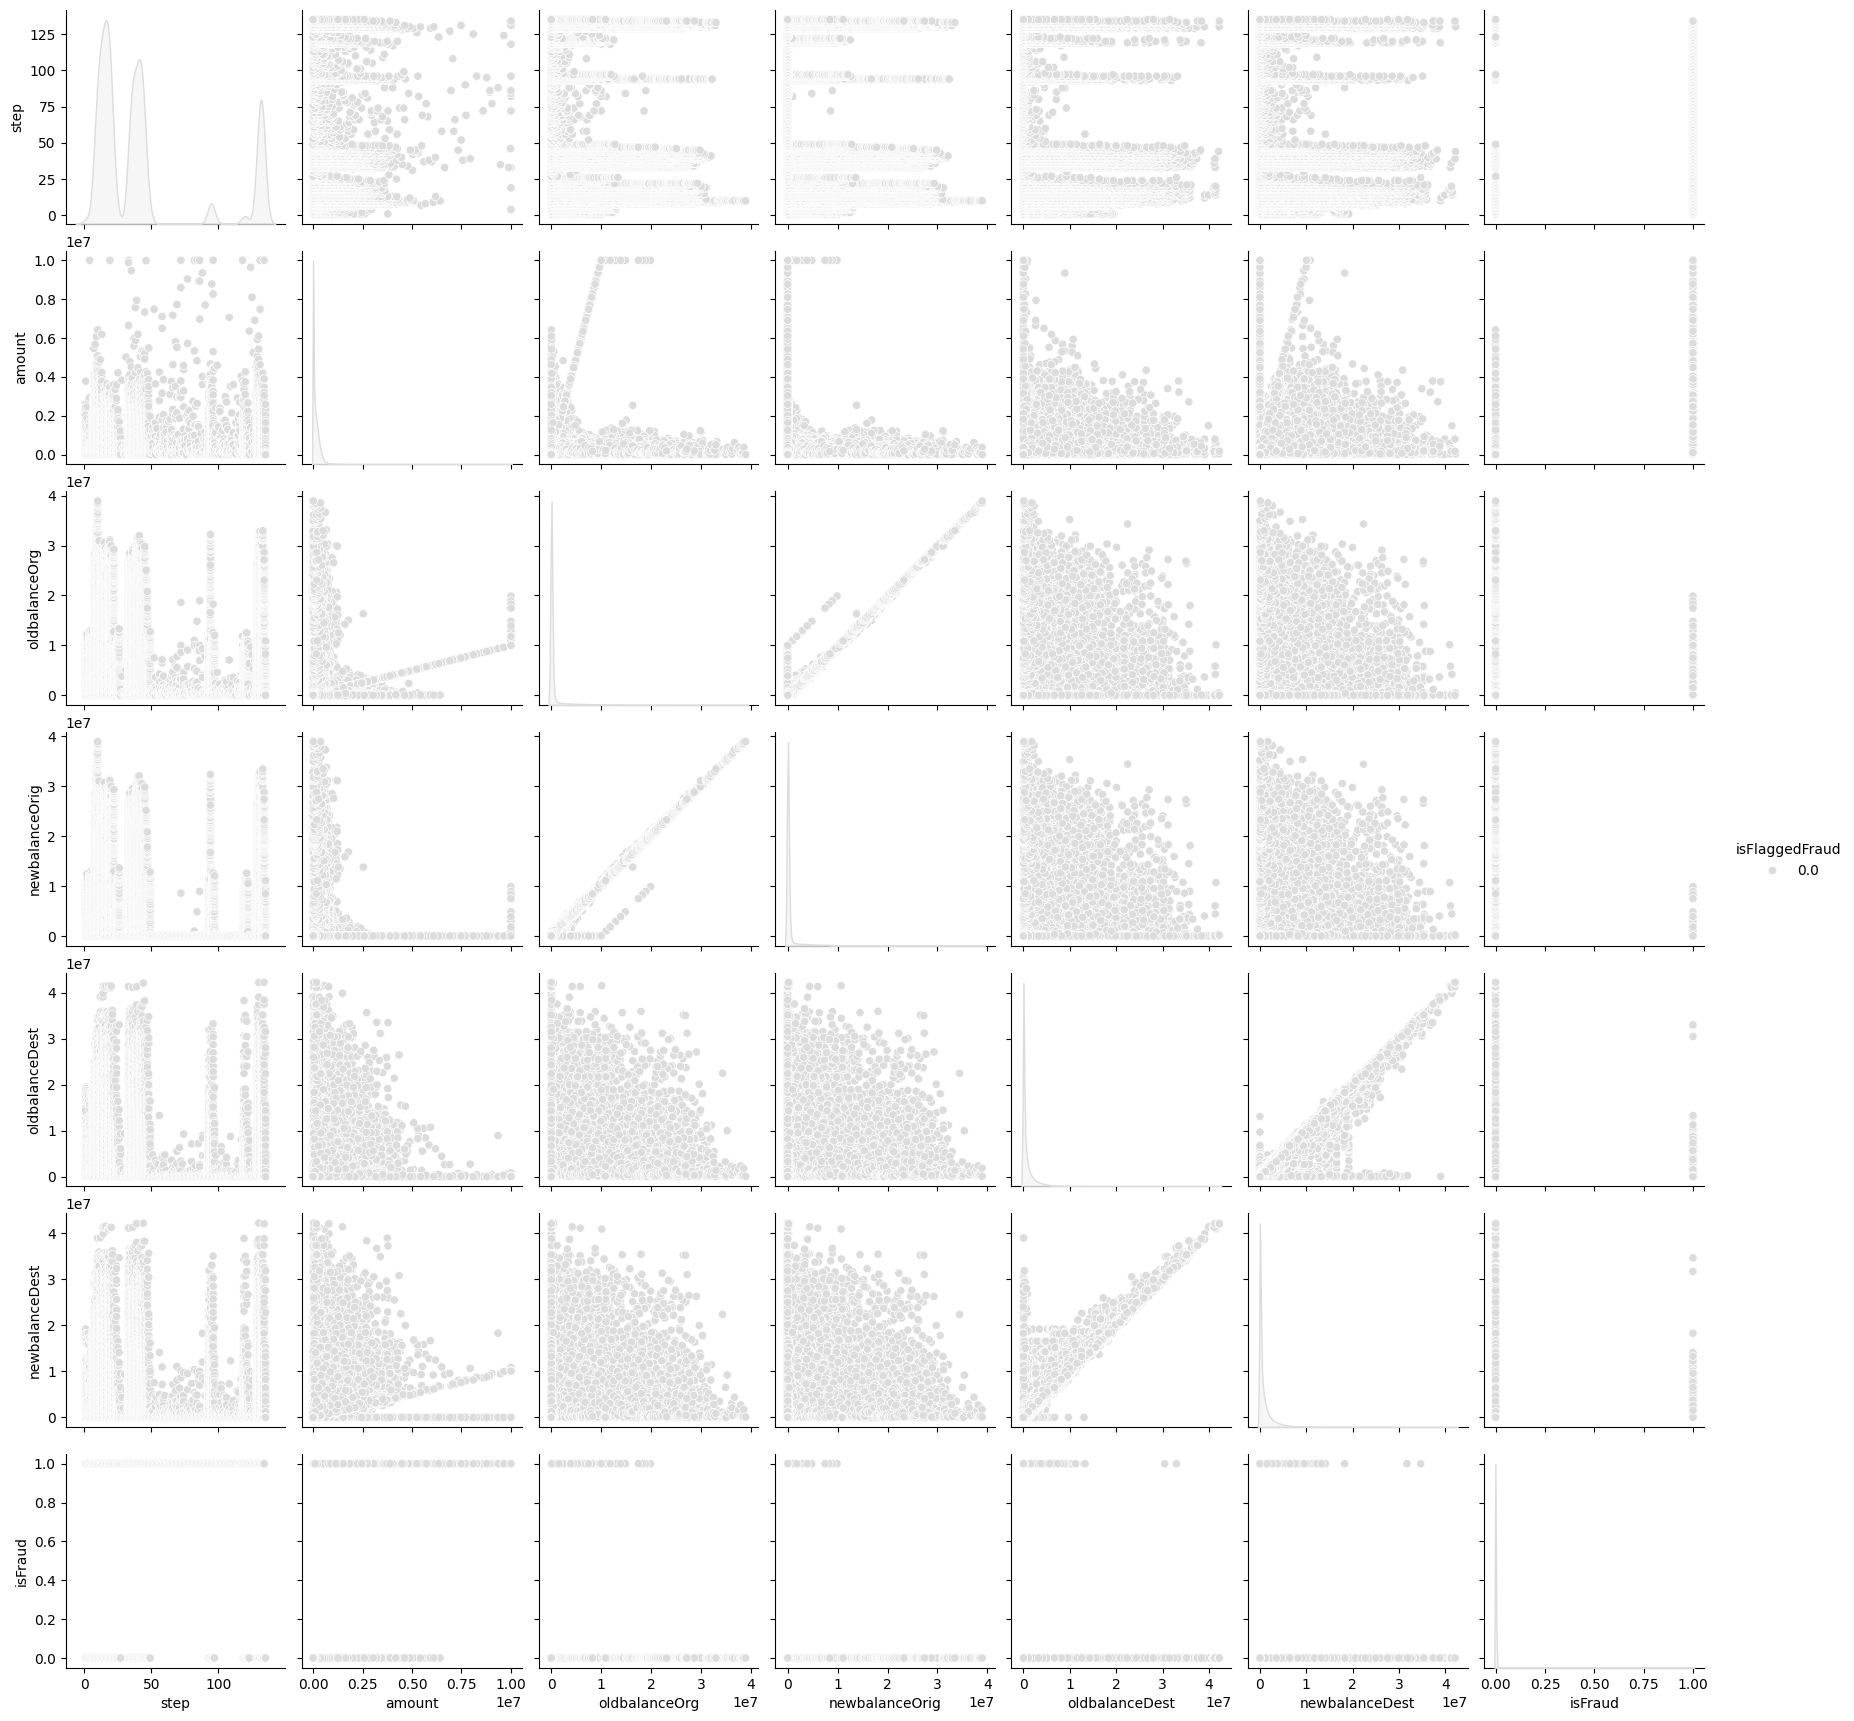

In [ ]:
sns.pairplot(data,hue='isFlaggedFraud',palette='coolwarm')

In [ ]:
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64


In [ ]:
# Delete rows with null values
data = data.dropna()

print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [ ]:
data['type'].value_counts()

,count
type,
CASH_OUT,430421
PAYMENT,410076
CASH_IN,263977
TRANSFER,100524
DEBIT,8285


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le=LabelEncoder()

In [ ]:
data['type']=le.fit_transform(data['type'])

In [ ]:
data['nameOrig'].value_counts()

,count
nameOrig,
C1654077167,2
C30177513,2
C796288830,2
C111557025,2
C1799137176,2
...,...
C1951824370,1
C286505646,1
C1831660509,1


In [ ]:
data['nameDest'].value_counts()

,count
nameDest,
C985934102,98
C1286084959,96
C248609774,90
C1590550415,89
C665576141,88
...,...
M576505967,1
M857119935,1
M2110802192,1


<Axes: >

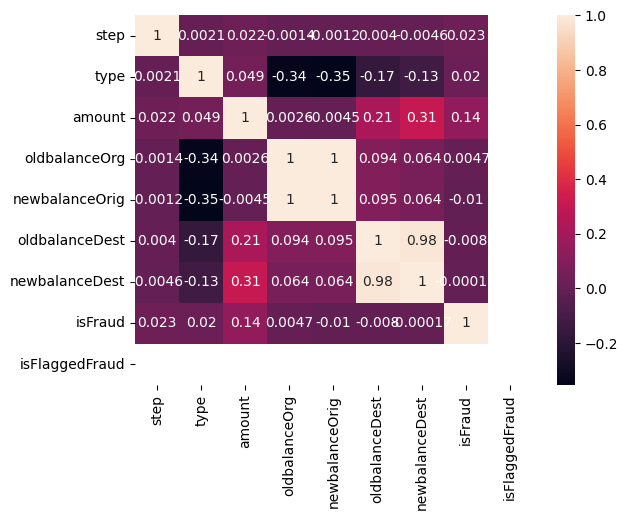

In [ ]:
sns.heatmap(data.corr(numeric_only=True),annot=True)

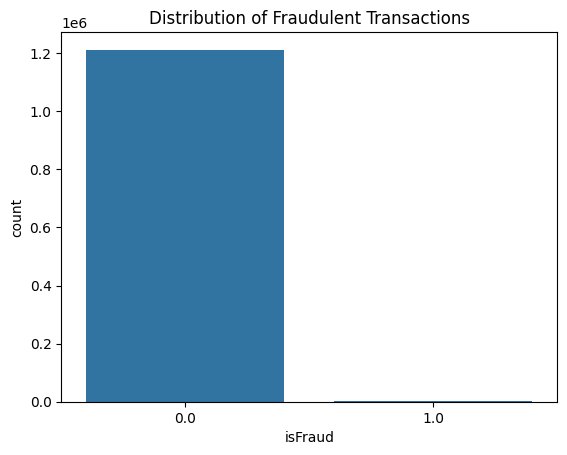

In [ ]:
sns.countplot(x='isFraud', data=data)
plt.title('Distribution of Fraudulent Transactions')
plt.show()


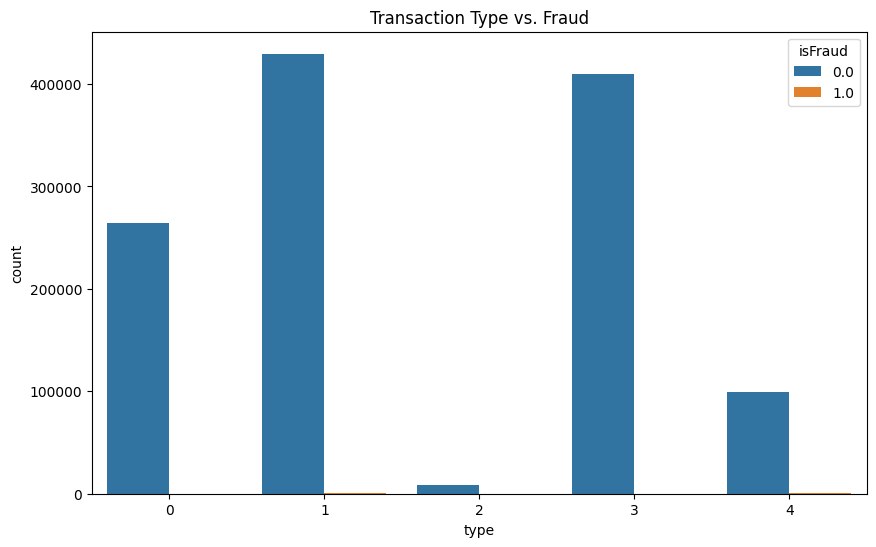

In [ ]:
# Analyze the relationship between transaction type and fraud
plt.figure(figsize=(10, 6))
sns.countplot(x='type', hue='isFraud', data=data)
plt.title('Transaction Type vs. Fraud')
plt.show()

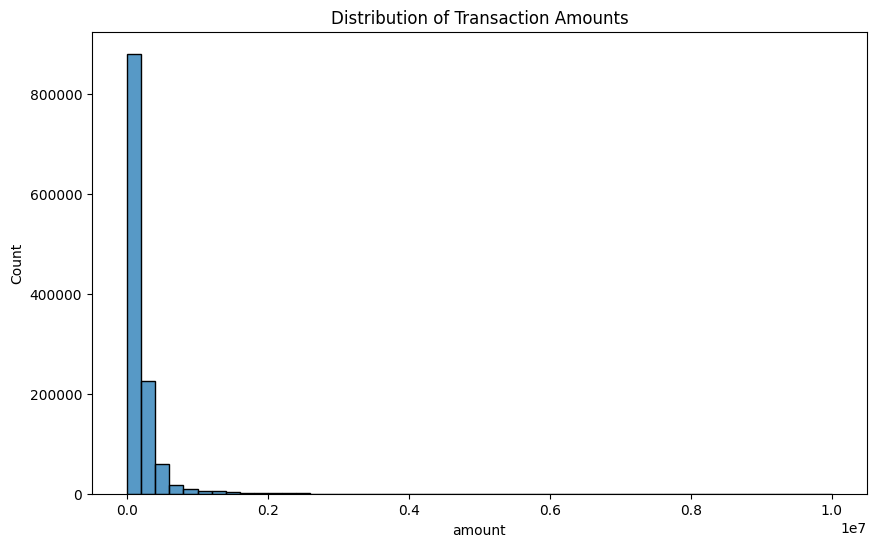

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['amount'], bins=50)
plt.title('Distribution of Transaction Amounts')
plt.show()

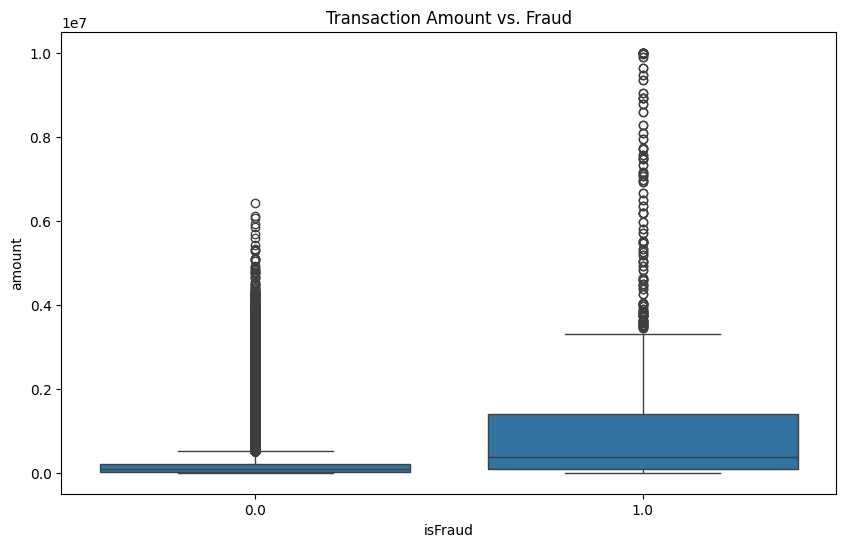

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='amount', data=data)
plt.title('Transaction Amount vs. Fraud')
plt.show()

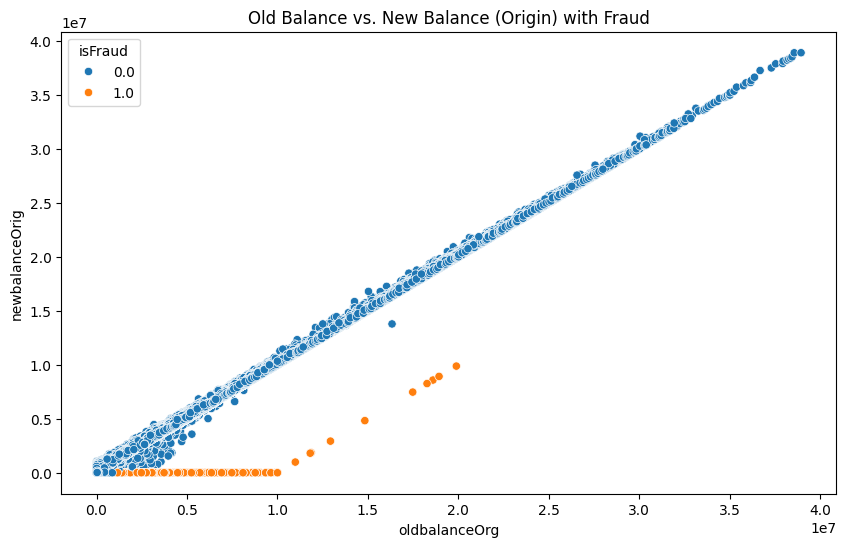

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='oldbalanceOrg', y='newbalanceOrig', hue='isFraud', data=data)
plt.title('Old Balance vs. New Balance (Origin) with Fraud')
plt.show()


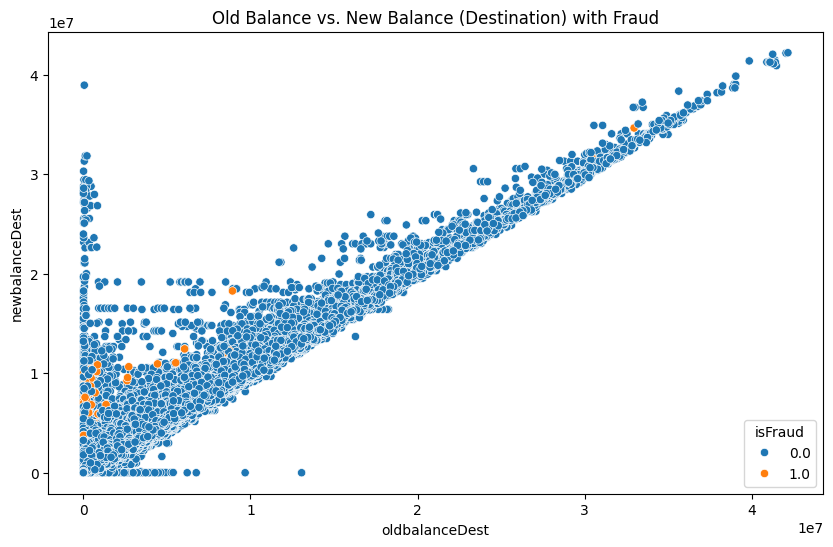

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='oldbalanceDest', y='newbalanceDest', hue='isFraud', data=data)
plt.title('Old Balance vs. New Balance (Destination) with Fraud')
plt.show()

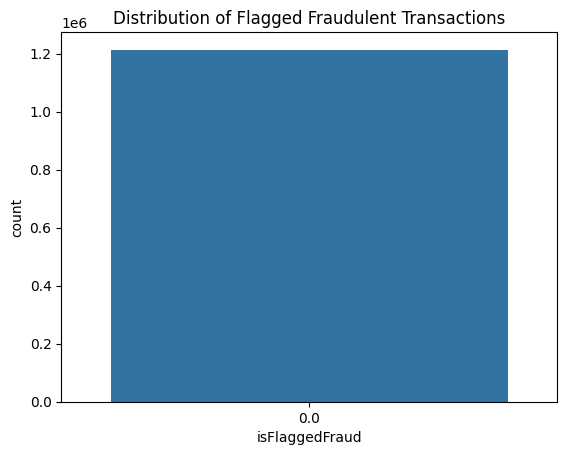

In [ ]:
sns.countplot(x='isFlaggedFraud', data=data)
plt.title('Distribution of Flagged Fraudulent Transactions')
plt.show()


In [ ]:
pd.crosstab(data['isFlaggedFraud'], data['isFraud'])


isFraud,0.0,1.0
isFlaggedFraud,,
0.0,1211759,1524


In [ ]:
numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [ ]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,-0.555244,C1231006815,-0.237302,-0.244431,M1979787155,-0.426883,-0.461838,0.0,0.0
1,1,3,-0.584317,C1666544295,-0.287475,-0.291341,M2044282225,-0.426883,-0.461838,0.0,0.0
2,1,4,-0.590454,C1305486145,-0.294575,-0.297794,C553264065,-0.426883,-0.461838,1.0,0.0
3,1,1,-0.590454,C840083671,-0.294575,-0.297794,C38997010,-0.417675,-0.461838,1.0,0.0
4,1,3,-0.548578,C2048537720,-0.280633,-0.287845,M1230701703,-0.426883,-0.461838,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1213278,133,0,-0.222871,C1104517281,-0.277715,-0.247450,C1139443388,0.293038,0.181979,0.0,0.0
1213279,133,0,-0.145618,C753348239,-0.291413,-0.253928,C53620114,4.543752,4.221484,0.0,0.0
1213280,133,1,-0.106441,C1578034653,-0.281085,-0.297794,C2130872679,2.129167,2.027522,0.0,0.0
1213281,133,3,-0.363336,C1463074346,-0.294567,-0.297794,M986264829,-0.426883,-0.461838,0.0,0.0
